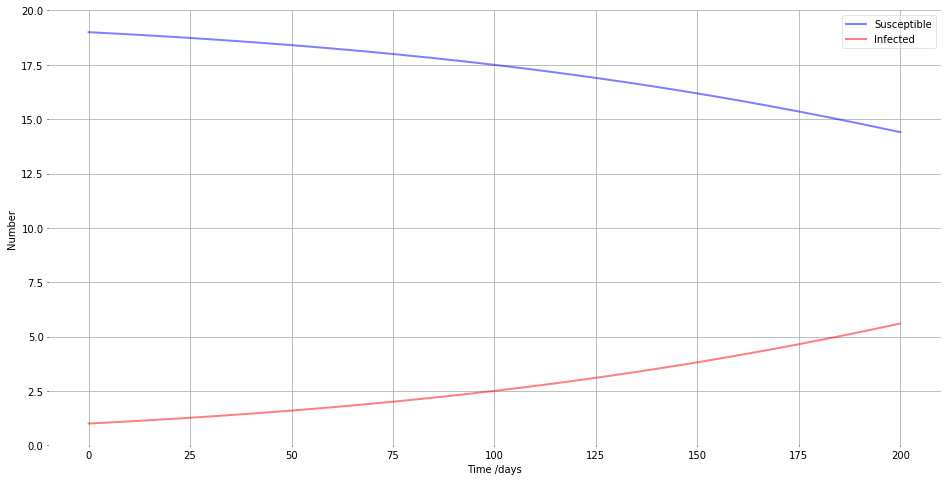

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 16, 8

# Total population, N.
N = 20
# Initial number of infected I0.
I0 = 1
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Contact rate, beta.
beta= 0.01
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SI model differential equations.
def deriv(y, t, N, beta):
    S, I = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N 
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0
# Integrate the SI equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta))
S, I = ret.T

# Plot the data on three separate curves for S(t), I(t)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0, N)
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=1)
# ax.grid(b=True, which='major', c='b', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.grid()
plt.show()